### Table of Contents


## 7 <a href="#">Model training and testing</a>
>7.1 <a href="#linear-regression">Linear regression</a>
>>>7.1.1 <a href="#normal-equation">The normal Equation and its complexity</a><br>

>7.2 <a href="#gradient-descent">Gradient descent</a><br>
>>>7.2.1 <a href="#BGD">Batch Gradient descent</a><br>
>>>7.2.2 <a href="#SGD">Stochastic Gradient descent</a><br>

>7.3 <a href="#polynomial">Polynomial regression</a><br>
>>> 7.3.1 <a href="#learning-curves"> Learning Curves</a><br>
>>> 7.3.2 <a href="#early-stopping">Early stopping</a>

>7.4 <a href="#logistic">Logistic regression</a><br>
>>>7.4.1 <a href="#estimation">estimation of probabilities</a><br>
>>>7.4.2 <a href="#cost-training">Training and cost function</a><br>
>>>7.4.3 <a href="#decision">Decision boundaries</a><br>

In the last two chapters, we have dealt with two kinds of problems in supervised learning. One is "regression" and the other one is "classification". And we have used some ML models to predict the data.

But they are just like we used and passed some parameters to the models.. It is necessary to know how things work. We still don't know how those models predict the data. It is just like a black box that we have seen in the last two chapters.

In this chapter we'll learn how Linear Regression will able to predict the target variables. We'll learn how this model works and trains in a few different ways. Let's get started

## <a id="linear-regression" name="linear-regression"> 7.1 Linear Regression</a>

Linear regression is the simplest machine learning model that is used especially for regression tasks (predicting continuous values).

We'll see how to train linear regression in 2 different ways;
- using a closed equation called **normalized equation**
- using **Gradient descent**

Linear regression predicts the values based on computing the weighted sum of input features along with a *bias term*(also called *intercept*). Check the below equation.


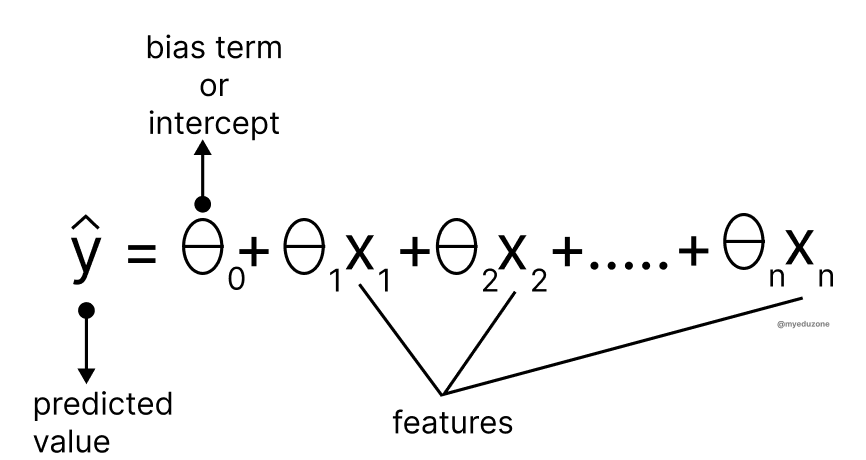

We can write the above equation more concisely as;


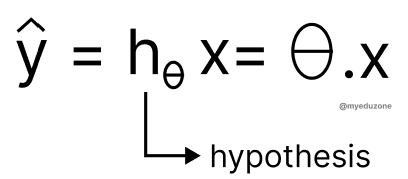

Hypothesis is a function that is created by the model after training with the features. **`θ`** is the model parameter and **`θₒ`** is the bia term.

The new unseen input features are given to this hypothesis and this will predict the results based on the model parameter it has got.

Based on the above equation we train the linear regression model. But first, we need to find the Θ value so that we can reduce the RMSE. Since RMSE is the performance measure mostly used for the regression model that's why we now find the θ value.

Instead, we'll choose MSE regardless of RMSE which yields the same result. So, to train the linear regression we first need to find the ϴ value.

So,We find MSE for linear regression using the below equation. It's already shown in the previous chapter also;

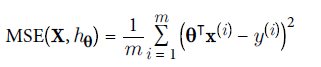

With the help of the above equation, linear regression will calculate the MSE of the training set to find the best model parameter.

But to minimize this MSE value we need to find the best θ. For that we'll use either **closed normal equation** or by using **gradient descent**.

### <a id="normal-equation" name="normal-equation">7.1.1 The normal Equation and its complexity</a>

So, our linear regression at the back end calculates the θ value with the help of a normal equation or using gradient descent.

In this section, we'll see how it is calculating the θ value using a normal equation. Generally, the normal equation of the linear regression that computes the value of θ is shown below;

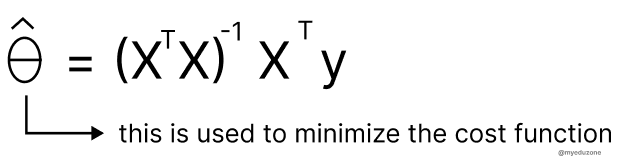

- 𝒴 contains the target variables
- 𝐗ᵀ is the transpose of the input features


Now let's write the code that manually computes these values. But in real time we don't need to calculate this value. The model itself does the task. It is good to know how things work. So that's why we'll see how to compute it manually.

So let's generate some random data that is linear.

In [1]:
import numpy as np

np.random.seed(42)
m = 100
x = 2 * np.random.rand(m,1)
y = 4 + 3 * x + np.random.randn(m,1)

Random data is produced by this code for a basic linear regression model. With random features **`(x)`** and matching target variables **`(y)`**, it generates 100 instances. A linear equation is used to model the relationship between x and y. To simulate real-world data, random noise is added.

Using **`x`** **`= 2*np.random.rand(m, 1)`** , a NumPy array (x) with m rows and 1 column is created and randomly assigned values between 0 and 2. The features are represented by these numbers.

Using a linear relationship between the features (x) and the target variable (y), **`y = 4 + 3*x + np.random.randn(m, 1)`**  is generated. Using **`np.random.randn`**, it adds random noise to replicate the variability present in real-world data.

Let's plot the data how it looks like.


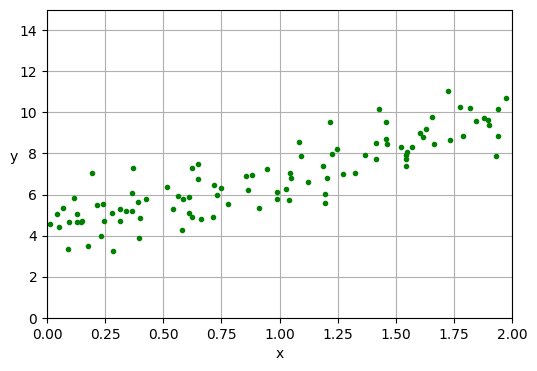

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(x,y,'g.')
plt.axis([0,2,0,15])
plt.xlabel('x')
plt.ylabel('y',rotation=0)
plt.grid()
plt.show()

That is how we create the linear data. You can see that the data we have generated is plotted.

Now let's compute the θ value using a normal equation. We'll use a few methods from the numpy library that we haven't learned in the numpy chapter.

In [3]:
from sklearn.preprocessing import add_dummy_feature

x_b = add_dummy_feature(x)

theta = np.linalg.inv(x_b.T @ x_b) @ x_b.T @ y # check the equation that is given in 7.1.1 section it is same.

We have computed the θ value from the previous cell. Instead of using the x features directly, we have added the dummy features using **`add_dummy_feature`** from **`sklearn.preprocessing`**. We add bias term using this method.

Using **`np.linalg.inv()`** we performed the inverse of the matrix and using **`x_b.T`** we performed the transpose of a matrix. And at last **`@`** is used for matrix multiplication.

We already learned these things in the previous chapter.


We have generated the y data using 4+3x. So, let's check what is our theta values are.

In [4]:
theta

array([[4.21509616],
       [2.77011339]])

I was expecting θₒ=4 and θₗ = 3 but we got 4.2 and 2.7. The values are very close enough. But we have given the noise to the data so it didn't went in that way.

Let's make predicts using this θ values.

In [5]:
x_new = np.array([[0],[2]]) #created new feature with 2 rows and 1 column
x_new_b = add_dummy_feature(x_new) # this is to add a bias term to the feature
y_predicted = x_new_b @ theta # this is the equation that is simplified version of large equation shown in the beginning
y_predicted

array([[4.21509616],
       [9.75532293]])

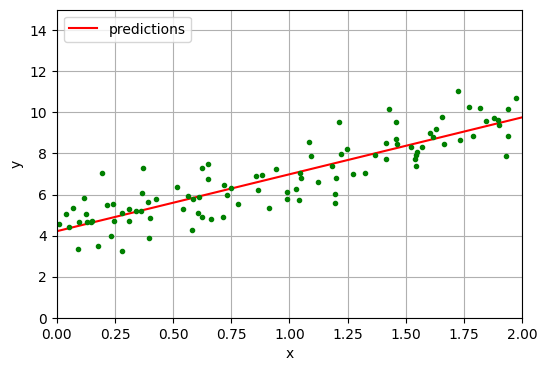

In [6]:
plt.figure(figsize=(6,4))
plt.plot(x_new,y_predicted,'r-',label='predictions')
plt.plot(x,y,'g.')
plt.axis([0,2,0,15])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend(loc='upper left')
plt.show()

The predicted values are shown as the red line.

This is how it calculates the θ value and then gives the prediction. All these tasks are done by the Linear regression at the backend. We just create the instance for the class and fit the values and then we train but we won't do all these things.

Let's predict the values using the LinearRegression.

In [7]:
from sklearn.linear_model import LinearRegression

l_regressor = LinearRegression()
l_regressor.fit(x,y)
l_regressor.predict(x_new)

array([[4.21509616],
       [9.75532293]])

You see we got the same values. This is how the linear regression will predict the values.

All the previous sections tell you how this prediction by Linear regression is done.

Let's check what is the intercept(bias term) and the coefficient it has.

In [8]:
l_regressor.intercept_

array([4.21509616])

In [9]:
l_regressor.coef_

array([[2.77011339]])

They are the same but the only thing is that we have performed everything manually showing how the linear regressor will do that.

- Sometimes **`x_b.T`** fails to do the transpose operation. In that case, we use the **pseudo inverse** operation.

- Normal equation computes the values using transpose and inverse. If it fails then we go for **`pseudo inverse`**.

- The pseudo inverse is computed using **SVD-Single values decomposition**.

- If 𝐗ᵀ𝐗 is not invertible we use 𝐗+𝒴 = θ where 𝐗+ is the pseudo inverse.

- SVD decomposes a single matrix into three matrices;

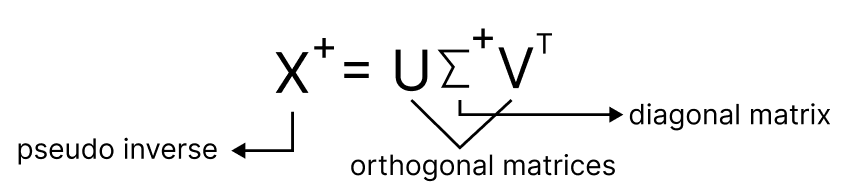

#### Key points to be noted
- The time required to compute the invert operation for the model is O(1.24) to O(1.3) which is constant and efficient.

- If we increase the number of features then the time taken to compute the values will also increase.

- SVD approaches uses O(n^2) to compute the pseudo inverse.

- Training the linear regression model with less number of features is very fast when you choose a normal equation.

- It makes predictions very fast when the features are minimal and uses the normal equations for them.


But if the features are too many then we used another approach which is Gradient descent.

## <a id="gradient-descent"  name="gradient-descent">7.2 Gradient Descent</a>

Gradient descent is another way where we can train the linear regression model. It is an optimization technique capable of finding the optimal solutions to a wide range of problems.

The main idea of the gradient descent algorithm is to improve the parameters iteratively until it gets the minimum cost function(which means less error difference).



### <a id="BGD" name="BGD">7.2.1 Batch Gradient descent</a>

Imagine yourself in a completely dark room that is furnished. Locating the room's lowest point is your objective. You navigate toward the steepest slope by feeling the tilt of the ground beneath your feet and trying to land at the lowest point. This approach is similar to machine learning's gradient descent method in that iteratively modifies parameters to reduce errors until an ideal solution is reached.


When you are dealing with gradient descent in practice you will set a random value to θ initially which is called **random initialization**, there by increasing its value gradually to find the best param.

By gradually increasing this θ value you should notice a gradual decrease in cost function (e.g. MSE).

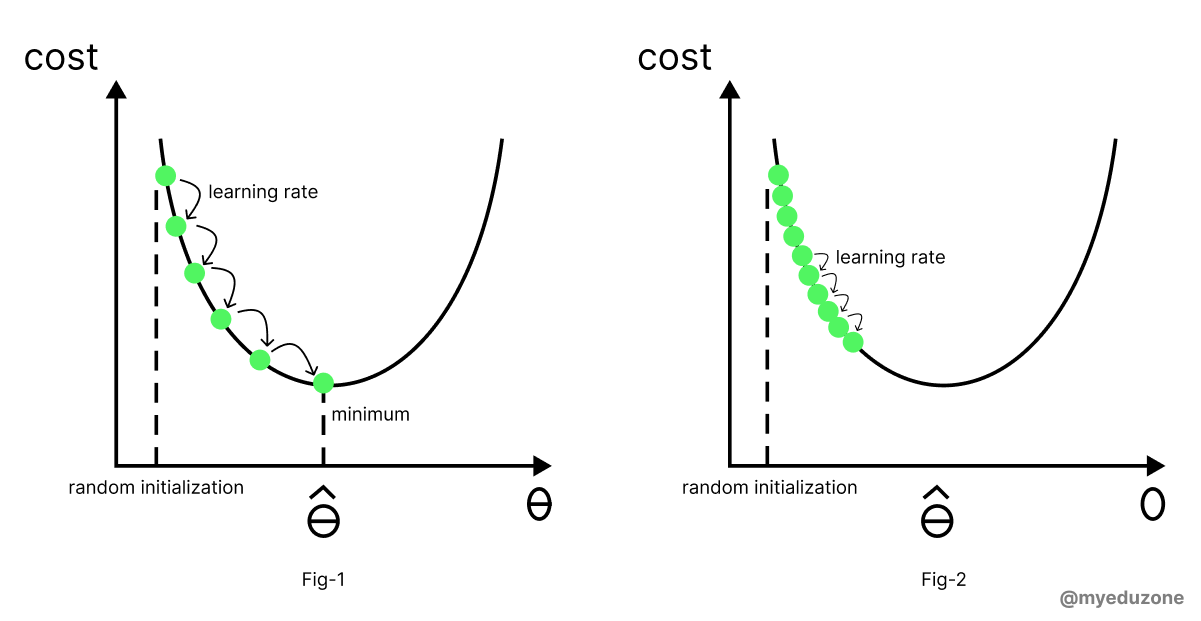

The graph tells you how the gradient descent works. Initially, it assigns a value to the θ and then gradually increases/decreases its values so that the cost function gets decreased.

It repeats the process until it reaches the minimum value of θ. And an important parameter that we need to consider here is the "*learning rate*". The Fig-1 shows that the learning rate is greater such that it has taken less number of iterations to reach the sleepest point.

In the fig-2 the learning rate is much less where it is taking so many iterations to reach the tweak point.

Like if the learning rate is too high then it jumps from one point to another like that is show below.

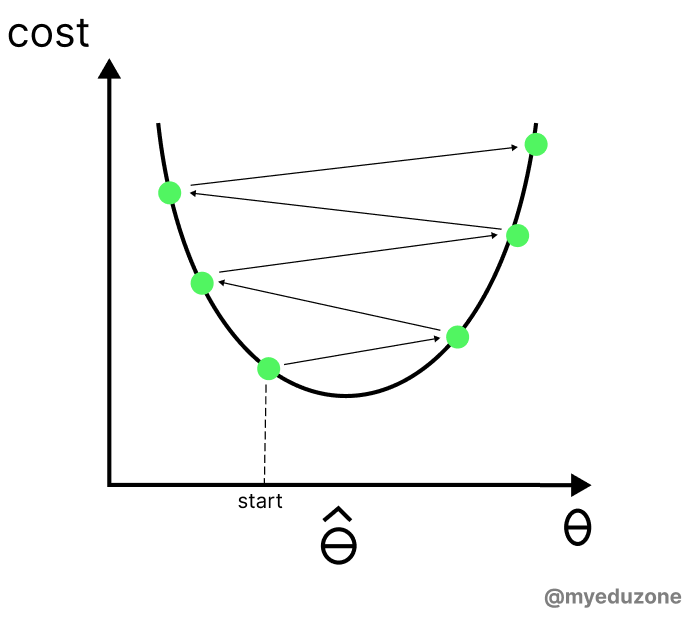

#### Points to be noted

- The cost function MSE for linear regression is something different.

- It is a **convex** function, where any two points on the curve when connected with a line segment will always be above the curve only.

- This tells us that there are no local minima except one global minima.

- Also the cost function is a continuous function with a slope that never changes suddenly.

The cost function takes two different shapes for linear regression with scaling and without scaling. It takes the shape of the bowl when the data is scaled and oval like shape when the features are not scaled.

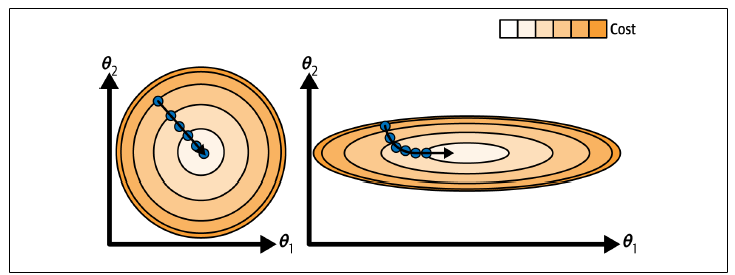

The left graph shows the gradient descent for scaled data and the right graph shows the gradient descent without feature scaling of data.

**Local minima** is the smallest point of the curve made by the cost function and the **global minima** is the absolute smallest point of the cost function.

We only aim to know how this linear regression will find the θ value. It used a normal equation to get the θ value and now how it will use the gradient descent concept to find θ?

That is why we have discussed all these small concepts like local and global minima.

To find θ we need to implement gradient descent, and to implement gradient descent first we need to find the gradient. This gradient of the cost function is found using ***partial derivatives***.

By using partial derivatives you can know how much the cost function will change for every little bit of change in θ value.

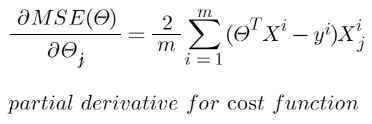

Remember the above-given formula. θj value is the model parameter, m is the number of instances, Xi are the features of the data set and yi are the target variables of the dataset.

You can simplify the above equation as;

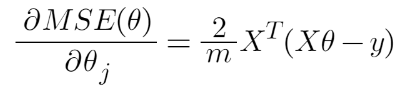

After finding the gradient of the cost function using partial derivatives then we need to find the gradient descent step.

**Gradient descent step** is an optimization technique that modifies model parameters step by step according to the loss function's slope.

We can find this using the below formula;

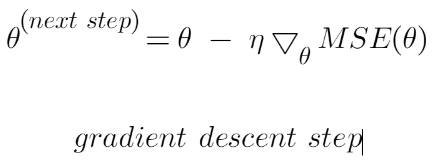

Where **η** is the **learning rate**.

Let's implement this gradient descent. Our steps are;

1. Find the gradient
2. set a learning rate
3. find the gradient descent step.

In [10]:
eta = 0.1 # this is the learning rate the alogrithm
n_epochs = 1000 # iterations
m = len(x_b)  #number of instances

np.random.seed(42)
theta = np.random.randn(2,1)  #random initialization

#find the gradient and theta for every parameter

for epoch in range(n_epochs):
  gradient = 2/m * x_b.T @ (x_b @ theta - y)  #this is the formula that we have written earlier.
  theta = theta - eta*gradient

We have set the **`η`** value to 0.1 by giving 1000 iterations and then we have initialized a random value to the **`θ`** and then using the for loop we have found the gradient and then computed the **`θ`** value.

This is what the above code tells us.

In [11]:
theta

array([[4.21509616],
       [2.77011339]])

There you see you got the same values as you did using the normal equation. The only new thing we have done is the θ value this time is found using a gradient descent algorithm.

We got the same values after computing the θ value using gradient descent for a learning rate of 0.1. What if the learning rate is different?

Let's change the  η value now.

In [12]:
eta = 0.5
n_epochs = 1000

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
  gradient = 2/m * x_b.T @ (x_b @ theta - y)
  theta = theta - eta*gradient

theta

array([[-5.00755774e+27],
       [-5.67142244e+27]])

This time the theta values are changed after we changed the learning rate. The values are totally negative.


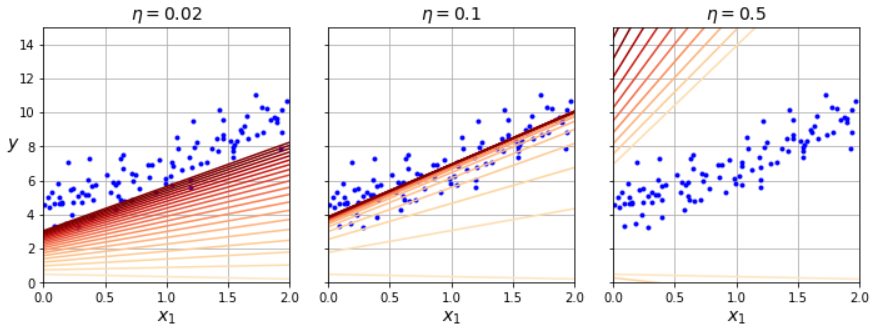

The plots tell us that the leftmost plot has having lower learning rate which will intentionally reach the solution but it will take a lot of time.

The middle plot has a good learning rate and is eventually spread across the curves. The rightmost curve has high learning in which the data points are jumped over the curves.

We can find the best value for learning rate using **`GridSearchCV`**.

#### points to be noted

- To set the learning rate it is better to use grid search.

- To know the number of epochs (iterations) you need to interrupt the model at a **tolerance** value. Tolerance is nothing but criteria where we decide to stop training the machine learning model.

- To choose the epochs then you need to interrupt the optimization algorithm (gradient descent) at a particular tolerance. **ϵ** is denoted as tolerance.

- If the cost function is very smooth and has no sudden changes in the curves then we can make it reach the optimal solution at a quick rate. This is called the convergence rate.

- Gradient descent takes O(1/𝞊) times to reach the optimal solution.

### <a id="SGD" name="SGD">7.2.2 Stochastic Gradient Descent</a>

Even though the Batch gradient descent that we have discussed in the last section is efficient it cannot handle large datasets.

It uses the entire training set to compute the gradients which makes it slower for large and even for small datasets.

To prevent this problem there comes Stochastic gradient descent. This algorithm is used for large datasets. It uses only one instance from the training set to iterate over multiple steps. It computes gradient using only one instance over multiple iterations.

The only negative with the Stochastic Gradient Descent is that it is lesser compared to Batch. This means that Stochastic has a random nature in which the cost function goes up and down very rapidly where as in Batch the cost function is smooth and will not have any abrupt changes.

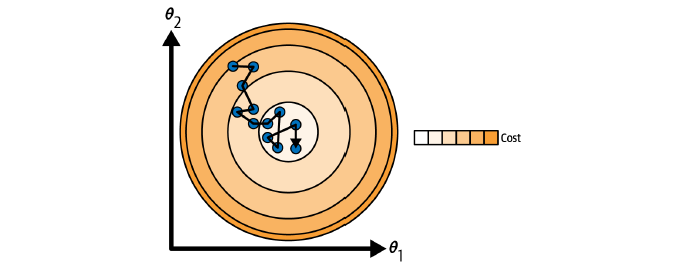

The above figure describes the nature of Stochastic gradient descent. It is very quick and also random. That is why it will reach to very near optimal solution.

Whatever the algorithm is whether batch or stochastic gradient it should find the global minima instead of local minima. If the cost function is irregular then the algorithm can most probably skip the local minima and can find the global minima.

#### Points  to be noted

- It is good to have randomness to the Stochastic gradient descent so that it can skip the local minima but we can't assure sometimes that it can reach to minium.

- This randomness allows the algorithms to take long steps with a certain learning rate.

- To make it prevent the global minima we need to gradually decrease the learning rate so that if even it starts with large steps by the point it is reaching the minimum the learning rate could be decreased.

- This is what we call ***stimulated annealing*** which means changing the physical and chemical properties of the metal slowly.

- So at every iteration we need to change the learning rate with the help of a function called ***learning schedule***.

- If this learning schedule decreases the learning rate very slowly the algorithm may end up stuck with local minima.

Let's implement Stochastic gradient descent.

In [13]:
n_epochs = 50
t0,t1 = 5,50

def learning_schedule(t):
  return t0/(t+t1)

np.random.seed(42)
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
  for iteration in range(m):
    random_index = np.random.randint(m)
    xi = x_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2*xi.T @ (xi @ theta - yi)
    eta = learning_schedule(epoch*iteration+m)
    theta = theta - eta*gradients

- From the code, we have set the number of iterations, **`n_epochs = 50`** with some configurations to the **`learning_schedule`** function.

- We have created a used defined function named "learning_schedule".

- Initialized the theta with random value.

- For computing the gradient using SGD we don't need to divide it by 'm'.

- **`random_index`** is to select the random instance from the training set.

- **`xi,yi`** are the features and targets that are selected randomly.

In [14]:
theta

array([[4.09864977],
       [2.89878341]])

There you go. You got the same theta value that you got for the normal equation and batch gradient descent. The only difference is that the procedure changes.

For the normal equation we have just used the equation to compute the theta, for batch gradient, we have used epochs and learning rates to compute the gradients and then the theta.

Later using SGD we found the theta value using the same gradient finding strategy but this time we won't divide it by 'm'.

You can observe that for Batch gradient we have set the epochs to 1000 but for SGD we have set the epochs to 50 only.

If you want to implement the linear regression using SGD the Sci-Kit learning provides **`SGDRegressor`** to do so.

In [15]:
from sklearn.linear_model import SGDRegressor

sgd_regressor = SGDRegressor (max_iter=1000,tol=1e-5,penalty=None,n_iter_no_change=100,eta0=0.01,random_state=42)
sgd_regressor.fit(x,y.ravel())

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

From the above code, we have created a linear regression model using an SGD regressor. For this regressor we have passed the number of iterations it should go through (**`max_iter=1000`**). There should be no regularization to be done by the model so the **`penalty=None`**.

The model runs until the cost function drops to 10^-5 which is why **`tol=1e-5`** under 100 iterations. And the learning rate initially is given as 0.01

#### points to be noted
- **`y.ravel()`**: ravel() method is used to flatten a multidimensional array to 1D array.

- To implement Linear regression using SGD we use **`SGDRegressor`**.

- Normal equation and SGD are fast when there are many instances (m) compared to Batch.

In [16]:
sgd_regressor.intercept_

array([4.21278812])

In [17]:
sgd_regressor.coef_

array([2.77270267])

At last, we have got the same values for the normal equation, batch gradient descent, and SGD. But the process has changed.

## <a id="polynomial" name="polynomial">7.3 Polynomial Regression</a>

Linear regression is suitable for linear data.  What if the data is nonlinear? And is more complex? To deal with this nonlinear data we use polynomial regression.

We have generated linear data using simple linear equations. Now using a quadratic equation we'll generate non-linear data.

In [18]:
np.random.seed(42)
m = 100
x = 6*np.random.rand(m,1)-3
y = 0.5*x**2+x+2+np.random.randn(m,1)

We have generated some random data using a quadratic equation.

Let's plot the above data.

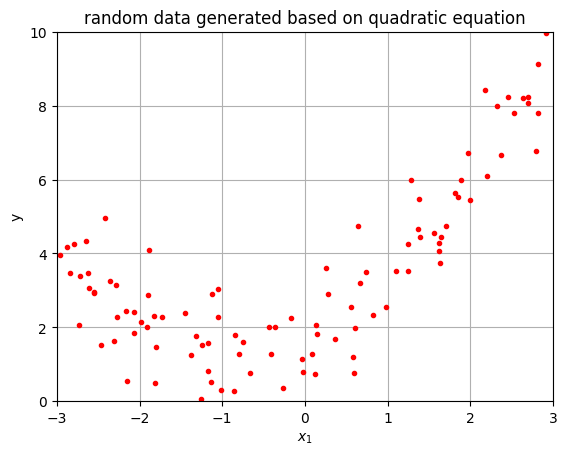

In [19]:
plt.plot(x,y,'r.')
plt.xlabel('$x_1$')
plt.ylabel('y')
plt.grid()
plt.title('random data generated based on quadratic equation')
plt.axis([-3,3,0,10])
plt.show()

From the graph, you can observe that the features range from [-3,3] and the target variables data ranges from [0,10].

There is nothing new to understand from the code. The code is readable.
The only point you need to remember from the graph is that the straight line can't be fit to this data.

We need to scale and transform data. The data is a polynomial-based one so we use the following code to scale and transform it.

In [20]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias = False)
x_poly_featured = poly_features.fit_transform(x)

Let's plot the graph after applying the transformations

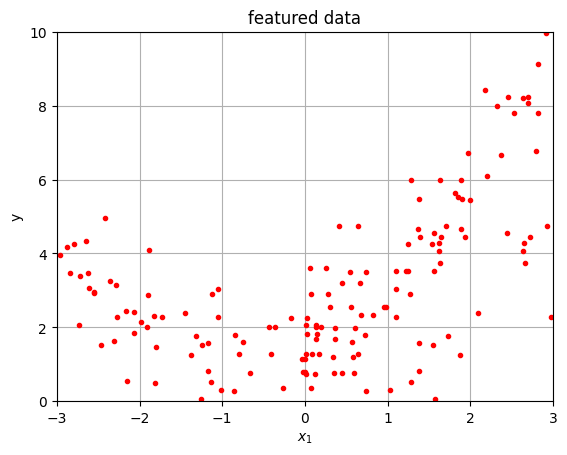

In [21]:
plt.plot(x_poly_featured,y,'r.')
plt.xlabel('$x_1$')
plt.ylabel('y')
plt.grid()
plt.title('featured data')
plt.axis([-3,3,0,10])
plt.show()

You can see the difference between the plots. The data(features) is featured using the **`PolynomialFeatures`** that randomly distributes the data.

We have transformed the data using the polynomial features from **`sklearn.preprocessing.`** Now using linear regression we'll fit the model.

In [22]:
l_regressor = LinearRegression()
l_regressor.fit(x_poly_featured,y)

LinearRegression()

That's it we have done scaling to the feature variables and trained the data to the linear model even though it is non-linear data.

In [23]:
l_regressor.intercept_

array([1.78134581])

In [24]:
l_regressor.coef_

array([[0.93366893, 0.56456263]])

Now let's predict some data by generating some new unseen features.

In [25]:
x_new = np.linspace(-3,3,100).reshape(100,1)
x_new_poly = poly_features.transform(x_new)
y_predict = l_regressor.predict(x_new_poly)

We have predicted the new unseen data. Let's plot the graph.

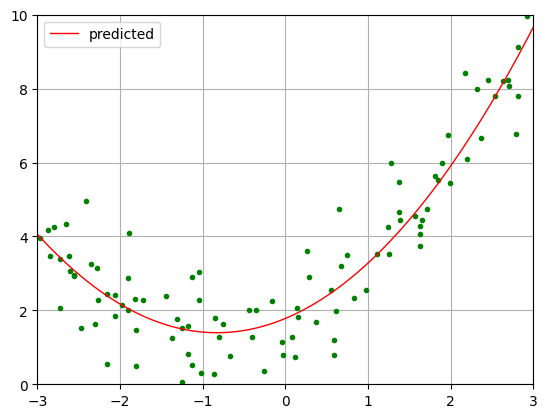

In [26]:
plt.plot(x,y,'g.')
plt.plot(x_new,y_predict,'r-',label='predicted',linewidth=1)
plt.grid()
plt.legend(loc='upper left')
plt.axis([-3,3,0,10])
plt.show()

It is quite good prediction from the model.

###<a id="learning-curves" name="learning-curves">7.3.1 Learning Curves</a>

So far, we have done the polynomial regression with degree=2. But if you increase the degree of the polynomial regression then there are high chances of better fitting of training data.

Sometimes, this results in overfitting of data as well. Let's look at a plot that we can understand more clearly.

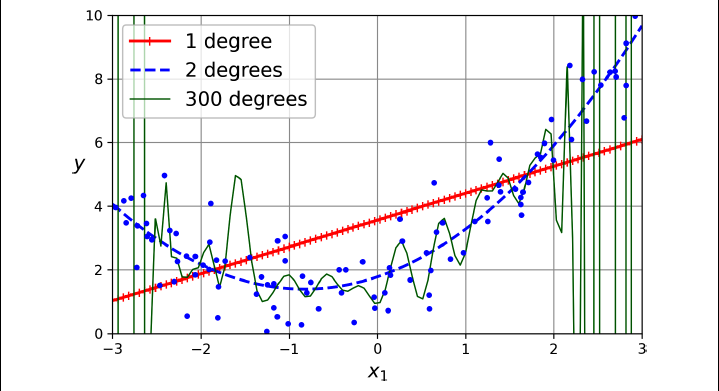

- You can see from the legend that we have plotted a graph by three different degrees. But the training data fits better for **`degree=300`** (green color) and the model has overfitted it. So, if the degree of the model is high then this is leading to overfitting of data.

- And also the model is not generalized properly. Remember if the model performed well on the training data but performed poorly on cross-validation then it has undergone overfitting.

- If the model performs poorly on both training data and at the time of cross validation then it is said to be underfitting.

- By remembering these points we can determine whether the model is simple or too complex.

- Also, we can say that the model is simple or complex using a strategy called **`learning curve`**.

**Learning curves** are the plots between the training error and the validation error.

Sci-kit learn provides **`learning_curve()`** method to plot the curves between the training set and the validation set. This method will return training set sizes, training scores, and validation scores.

Let's plot the learning curves for Linear regression.

In [27]:
from sklearn.model_selection import learning_curve

train_sizes,train_scores,valid_scores =  learning_curve(LinearRegression(),
                                                        x,y,train_sizes=np.linspace(0.01,1.0,40),cv=5,
                                                        scoring='neg_root_mean_squared_error')

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

**`learning_curve()`** returns **`train_sizes`**, **`train_scores`**, and **`valid_scores`** in which train and validation scores are negative because of using the metric "negative RMSE". That is why the (-) sign is used to convert the negative values to positive.

Let's plot the learning curves between training errors and validation errors.

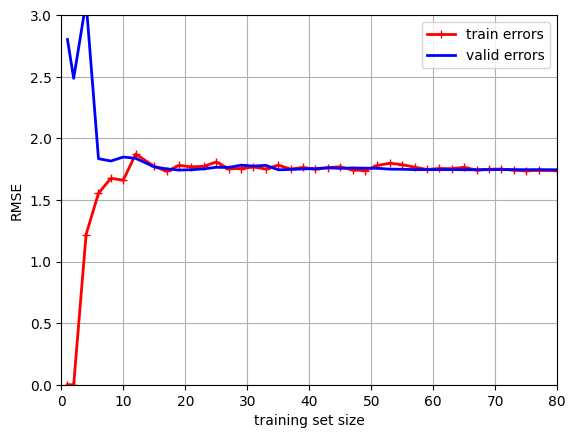

In [28]:
plt.plot(train_sizes,train_errors,'r-+',linewidth=2,label='train errors')
plt.plot(train_sizes,valid_errors,'b-',linewidth=2,label='valid errors')
plt.grid()
plt.axis([0,80,0,3])
plt.xlabel('training set size')
plt.ylabel('RMSE')
plt.legend(loc='upper right')
plt.show()

So from the above plot, we can clearly say that the model is too simple and underfitting the data.

So we have created non-linear data and asked for linear regression to fit the data but the model is too simple to fit the data.

For example, if the task of the model is to predict the house prices and initially if the training data has fewer models, it can easily predict the prices. But if the training data set is gradually increasing then it would be difficult for the model to predict. This is where the training error occurrs.

Coming to the validation error, initially the model may not find the relationship between the features and the house prices and gives a lot of errors while validating. But as soon as the training set increases it will get a lot of insights from the data and will find more relationships among the features and the target variables. This is where the validation set comes in.

Now let's perform the linear regression using the polynomial regression.

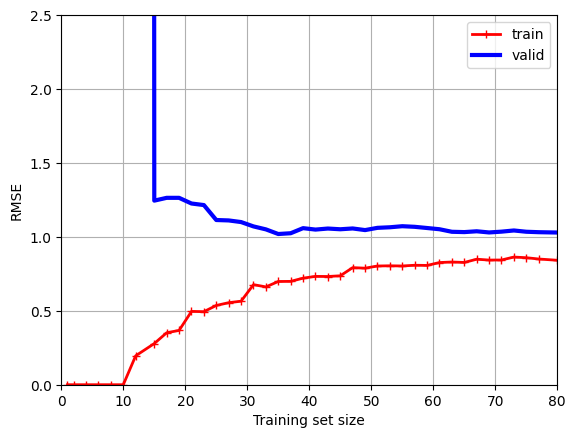

In [29]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, x, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

# plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 80, 0, 2.5])
plt.show()

From this plot, we can conclude that there is a gap between the train and validation errors. This means that the model performed well on the training set. And also it overfits the data.


#### points to be noted

- If the model is underfitting the data means the model is too simple. To avoid this we need to choose a complex model.

- If the model is overfitting the data means the model is complex. To train it well we need to add more training data to it.

**Generalization error**:
> It is a measure that how well a model can make accurate predicitions. There are three types of generalization errors;
>> - Bias
>> - Variance
>> - Irreducible errors.

1. **Bias:**
> It is the error made by the model for giving wrong assumptions on the training data. It could be generally due to underfitting of data.

2. **Variance:**
> These are the errors made by the model due to small fluctuations in training data. This is a result of overfitting of training data.

3. **`Irreducible errors:`**
>  This error raises due to the noise in the data. The only way to avoid this is to clean the data.

So, if the complexity of the model is increased this results in high variance and less bias. And if the model is too simple then this results in more bias and less variance. This is called **bias/variance trade off**.

So now we have to focus on preventing the overfitting of the model. This can be done using regularizing the linear models.

We can reduce the overfitting of the model by regularizing the polynomial degree of it.

We have different ways to regualize a model. They are;
- Ridge Regression
- Lasso Regression
- Elastic net regression

But we'll look into one of the most used one called "**Early stopping**".

###<a id="early-stopping" name="early-stopping">7.3.2 Early Stopping</a>

- Early stopping is best suited for iterative learning algorithms like gradient descent. Gradient descent used a learning rate to calculate the gradient as well as the θ value.

- To prevent or reduce the overfitting of data we use early stopping for mostly iterative learning algorithms.

- It stops training the model before the validation error reaches its minimum point.

- During the learning phase, the validation and training errors decrease. But when the early stopping was implemented the validation error stopped decreasing and halted the training.

Let's implement early stopping.

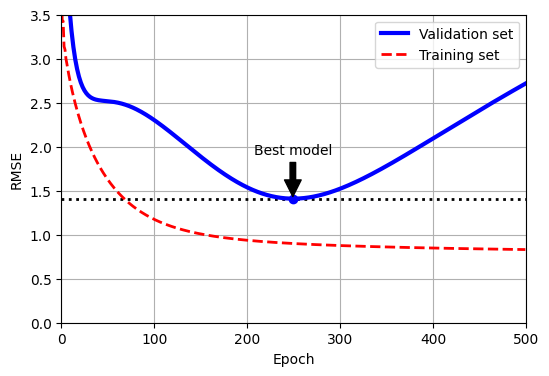

In [30]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# creates the same quadratic dataset as earlier and splits it
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]

preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False),
                              StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')
train_errors, val_errors = [], []  # it's for the figure below

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = mean_squared_error(y_valid, y_valid_predict, squared=False)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

    #  we evaluate the train error and save it for the figure
    y_train_predict = sgd_reg.predict(X_train_prep)
    train_error = mean_squared_error(y_train, y_train_predict, squared=False)
    val_errors.append(val_error)
    train_errors.append(train_error)

#  this section generates the plot

best_epoch = np.argmin(val_errors)
plt.figure(figsize=(6, 4))
plt.annotate('Best model',
             xy=(best_epoch, best_valid_rmse),
             xytext=(best_epoch, best_valid_rmse + 0.5),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([0, n_epochs], [best_valid_rmse, best_valid_rmse], "k:", linewidth=2)
plt.plot(val_errors, "b-", linewidth=3, label="Validation set")
plt.plot(best_epoch, best_valid_rmse, "bo")
plt.plot(train_errors, "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.axis([0, n_epochs, 0, 3.5])
plt.grid()
plt.show()

The provided code uses early stopping for regularization and stochastic gradient descent (SGD) to train a polynomial regression model. First, scaling input features for the training and validation sets and adding polynomial features are done. In a training loop that uses **`partial_fit()`** for incremental learning, the **`SGDRegressor`** model is used with no regularization and a low learning rate. The code computes the root mean square error (RMSE) on the validation set at each epoch.

The state of the model is saved in the **`best_model`** variable if the current RMSE is less than the lowest RMSE that was previously recorded. The code permits switching back to the best model after training, even though it doesn't explicitly stop training. Using **`deepcopy()`** guarantees a full copy of the model as **sklearn.base**, complete with learned parameters and hyperparameters for **`comparison.Clone()`** replicates only the hyperparameters.



## <a id="logistic" name="logistic">7.4 Logistic Regression</a>

Logistic regression is another commonly used algorithm that is used for both classification(mostly) and regression problems.

Logistic regression is used to find the probability that an instance belongs to a particular class based on the threshold value. If it finds the instance having greater value than threshold then it is classified into positive class and vice-versa.

All over, logistic regression will act as a binary classifier.

### <a id="estimation" name="estimation">7.4.1 Estimation of probabilites</a>

So far we have seen how linear regression works and what strategies are used by Linear Regression to find this and that. Now we'll see how logistic regression works.

Unlike Linear Regression, logistic regression will not output any linear output instead a logistic one (sigmoidal).

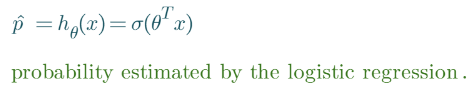

It uses the above formula to predict the probabilities of the instances to a particular class. **σ **is called the **logistic** that outputs between 0 to 1.

**σ** is calculated using below formula.

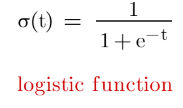

Let's plot a graph of it.

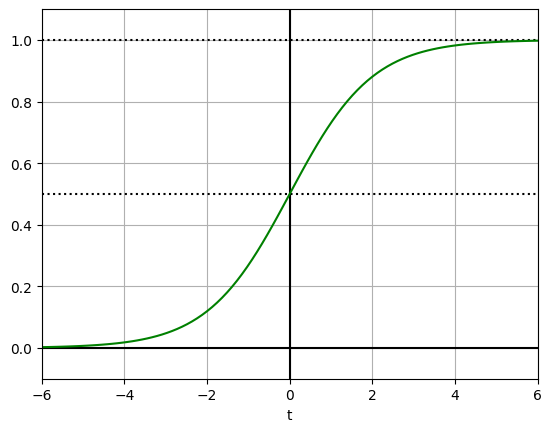

In [31]:
lim = 6
t = np.linspace(-lim,lim,100)

sigma = 1/(1+np.exp(-t))

plt.plot([-lim,lim],[0,0],'k-')
plt.plot([-lim,lim],[0.5,0.5],'k:')
plt.plot([-lim,lim],[1,1],'k:')
plt.plot([0,0],[-1.1,1.1],'k-')
plt.plot(t,sigma,'g-')
plt.xlabel('t')
plt.grid()
plt.axis([-lim,lim,-0.1,1.1])
plt.show()


This is what a logistic function graphically looks like.

After finding the probability of the instance and then it will classify the class to it based on the below formula.

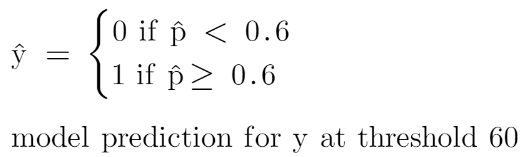

t is known as score or logist.

### <a id="cost-training" name="cost-training">7.4.2 Cost function and training</a>

Using the required formulas given above the logistic regression will estimate the probabilities. Logistic regression is trained based on the θ parameter in which the model estimates high probabilities for y=1 and low probabilities for y=0.

The cost function for single instance is given as;

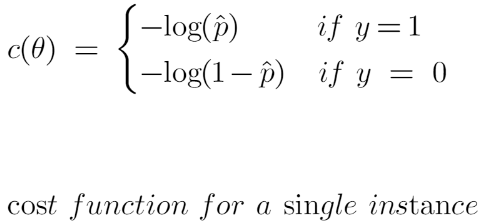

And the cost function for the entire training set is denoted with;

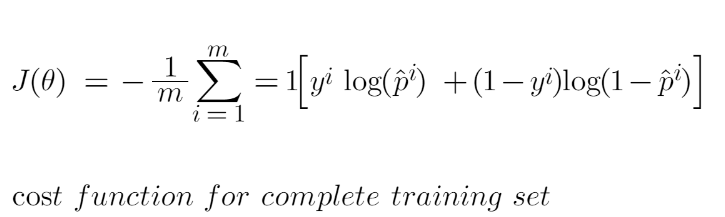

The above equation is also called "**log loss**".

This cost function is convex. We don't have any closed equations like the Normal equation to find the θ. But since it is convex then we can use gradient descent that uses learning rate to reach global minima.

So, we can write the above equation in terms of partial derivatives.

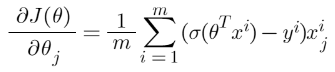

Using the above equation we compute the gradient value that helps the logistic regression to train.

### <a id="decision" name="decision">7.4.3 Decision Boundaries</a>

Let's implement the Logistic regression. For this, we take another famous data set called the "**iris dataset**".

This data set contains the **`sepal`**, **`petal`** and **`width`** of 150 flowers of types: *iris setosa*, *iris veriscolor* and *iris virginica*.

Now our task is to create a classifier that will detect *iris virginica* type only based on the **`petal width`** feature.

In [35]:
from sklearn.datasets import load_iris  #load the dataset
import pandas as pd

iris_data = load_iris(as_frame=True)

In [37]:
iris_data.data.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


You can see the first 5 rows(features) of data of the dataset.

In [38]:
iris_data.target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

These are our target variables of the dataset.Let's check what are our target names.

In [40]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [54]:
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x = iris_data.data[["petal width (cm)"]].values
y = iris_data.target_names[iris_data.target] == 'virginica'
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(x_train, y_train)

LogisticRegression(random_state=42)

We have split the data and created the logistic regression model and trained it.

Let's create a new column vector holding the petal width varying from 0 to 3 and we'll see how it estimated the porbabilities of it.

In [77]:
x_new = np.linspace(0,3,1000).reshape(-1,1)
y_prob = log_reg.predict_proba(x_new)

decision_boundary = x_new[y_prob[:,1]>0.5][0,0]

The code creates a column vector called **`x_new`** and uses logistic regression to predict class probabilities. It indicates the boundary of the decision where the expected probability of the positive class exceeds 0.5.

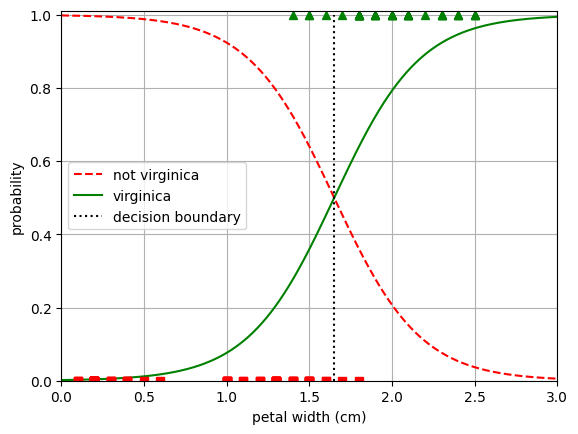

In [74]:
plt.plot(x_new,y_prob[:,0],'r--',label='not virginica')
plt.plot(x_new,y_prob[:,1],'g-',label='virginica')
plt.plot([decision_boundary,decision_boundary],[0,1],'k:',label='decision boundary')
plt.plot(x_train[y_train==0],y_train[y_train==0],'rs')
plt.plot(x_train[y_train==1],y_train[y_train==1],'g^')
plt.xlabel('petal width (cm)')
plt.ylabel('probability')
plt.legend(loc='center left')
plt.grid()
plt.axis([0,3,0,1.01])
plt.show()

In [78]:
decision_boundary

1.6516516516516517

We got the **`decision_boundary `**as 1.65. From the graph, we can conclude that the *iris* *virginica* has a petal length ranging from 1.4 to 2.5 (indicated in green triangles). The remaining flowers have petal lengths ranging from 0.1 to 1.7 (red squares).

Based on the decision boundary=1.65 it tells that the probability of petal width >1.65 is classified as *iris* *virginica* and  < 1.65 is classified as other flowers.

Let's give some random petal width value and check whether it is iris virginica or not.

In [80]:
log_reg.predict([[2.2]])

array([ True])

It is true, the flower with a petal width of 2.2 is virginica. Clearly, you can note this point from the graph that the width of the virginica petals ranges from 1.4 to 2.5

In [83]:
log_reg.predict([[1.11],[1.8]])

array([False,  True])

For the above code, one is false and the other one is true because the first value has a petal length < 1.4 and the 2nd value has a petal length > 1.4.

That's all for this lesson. We have learned how to train the models throughout this lesson.

### Summary

In this chapter, we have learned about training Linear and logistic regression models.

- We have used two different strategies to train the models one is a Normal equation and the other one is gradient descent.

- SGD is the classifier algorithm and we used SGD to implement polynomial regression.

- Learned about learning rate and learning schedule. We noted down some important formulas that will show how these algorithms work.